# zero mean and unit variance:

In [1]:
install.packages("rEDM")

also installing the dependency ‘RcppThread’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [2]:
library(rEDM)

In [5]:
data(tentmap_del)
str(tentmap_del)

Warning message in data(tentmap_del):
“data set ‘tentmap_del’ not found”


ERROR: Error in str(tentmap_del): Objekt 'tentmap_del' nicht gefunden


In [29]:
CARIACO <- read.csv("../DATA/January/Combined_CARIACO_data_v5.csv")

SatCHL = na.omit(CARIACO$u10)

In [30]:
length(SatCHL)

[1] 299

In [35]:
ts <- SatCHL
lib <- c(1, 100)
pred <- c(150, 299)

In [50]:
simplex_output <- simplex(ts, lib, pred)
str(simplex_output)

'data.frame':	10 obs. of  16 variables:
 $ E                  : int  1 2 3 4 5 6 7 8 9 10
 $ tau                : num  -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 $ tp                 : num  1 1 1 1 1 1 1 1 1 1
 $ nn                 : num  2 3 4 5 6 7 8 9 10 11
 $ num_pred           : int  150 150 150 150 150 150 150 150 150 150
 $ rho                :List of 10
  ..$ E1 : num 0.647
  ..$ E2 : num 0.711
  ..$ E3 : num 0.79
  ..$ E4 : num 0.815
  ..$ E5 : num 0.833
  ..$ E6 : num 0.824
  ..$ E7 : num 0.825
  ..$ E8 : num 0.828
  ..$ E9 : num 0.836
  ..$ E10: num 0.849
 $ mae                :List of 10
  ..$ E1 : num 0.885
  ..$ E2 : num 0.77
  ..$ E3 : num 0.655
  ..$ E4 : num 0.615
  ..$ E5 : num 0.58
  ..$ E6 : num 0.593
  ..$ E7 : num 0.602
  ..$ E8 : num 0.6
  ..$ E9 : num 0.59
  ..$ E10: num 0.581
 $ rmse               :List of 10
  ..$ E1 : num 1.1
  ..$ E2 : num 1
  ..$ E3 : num 0.85
  ..$ E4 : num 0.8
  ..$ E5 : num 0.764
  ..$ E6 : num 0.782
  ..$ E7 : num 0.78
  ..$ E8 : num 0.777
  ..$ E9

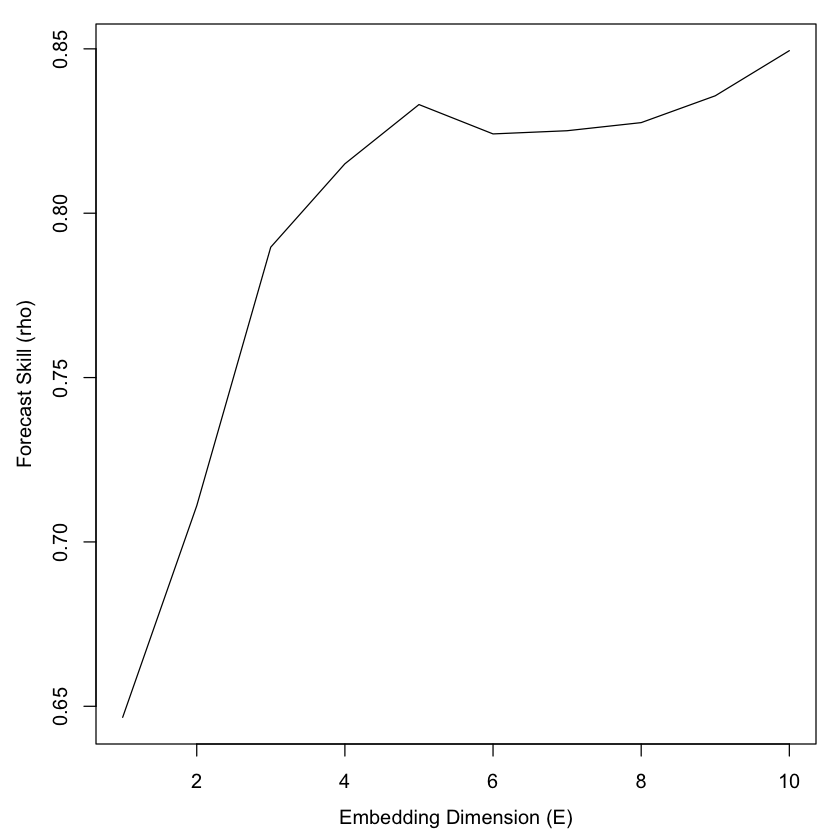

In [51]:
par(mar = c(4, 4, 1, 1), mgp = c(2.5, 1, 0))  # set margins for plotting
plot(simplex_output$E, simplex_output$rho, type = "l", xlab = "Embedding Dimension (E)", 
    ylab = "Forecast Skill (rho)")


In [38]:
### e

In [48]:
simplex_output <- simplex(ts, lib, pred, E = 2, tp = 1:10)

ERROR: Error in RtoCpp_Simplex(pathIn, dataFile, dataFrame, pathOut, predictFile, : Expecting a single value: [extent=10].


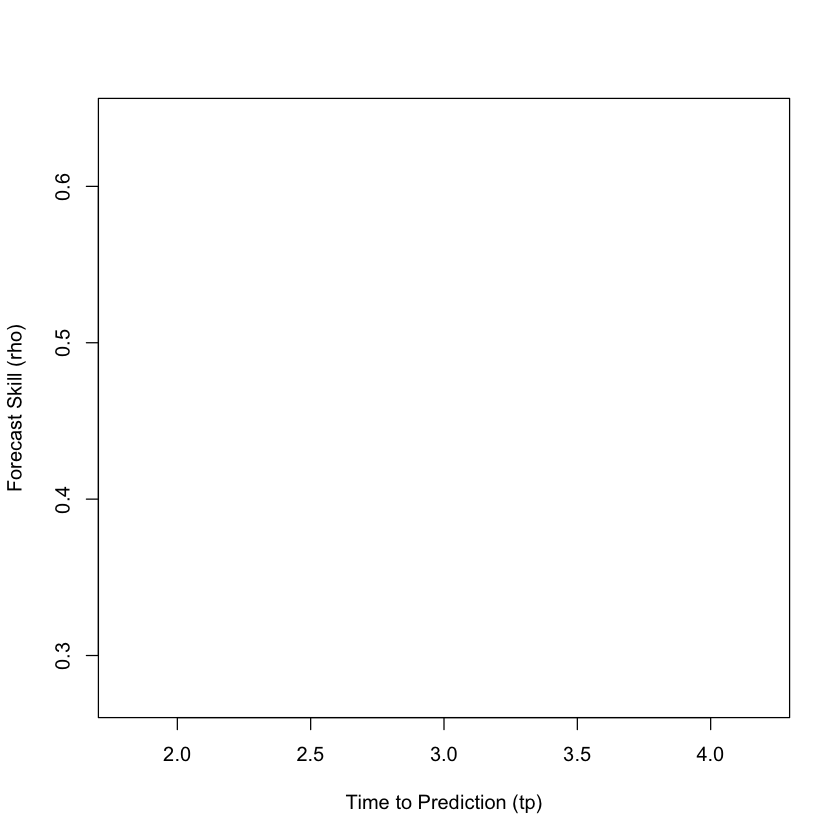

In [45]:
plot(simplex_output$tp, simplex_output$rho, type = "l", xlab = "Time to Prediction (tp)", 
    ylab = "Forecast Skill (rho)")

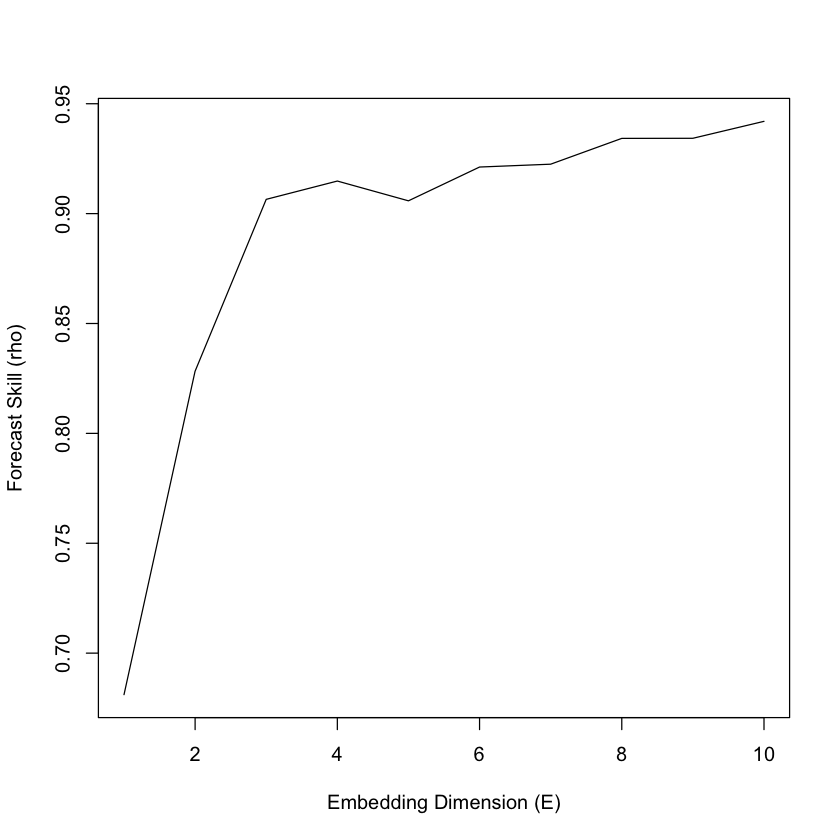

In [66]:
ts <- na.omit(CARIACO$u10)
lib <- c(1, 250)
pred <- c(271, 299)
simplex_output = simplex(ts, lib, pred)
plot(simplex_output$E, simplex_output$rho, type = "l", xlab = "Embedding Dimension (E)", 
    ylab = "Forecast Skill (rho)")

In [82]:
ts <- na.omit(CARIACO$Chlorophyll)
length(ts)

[1] 231

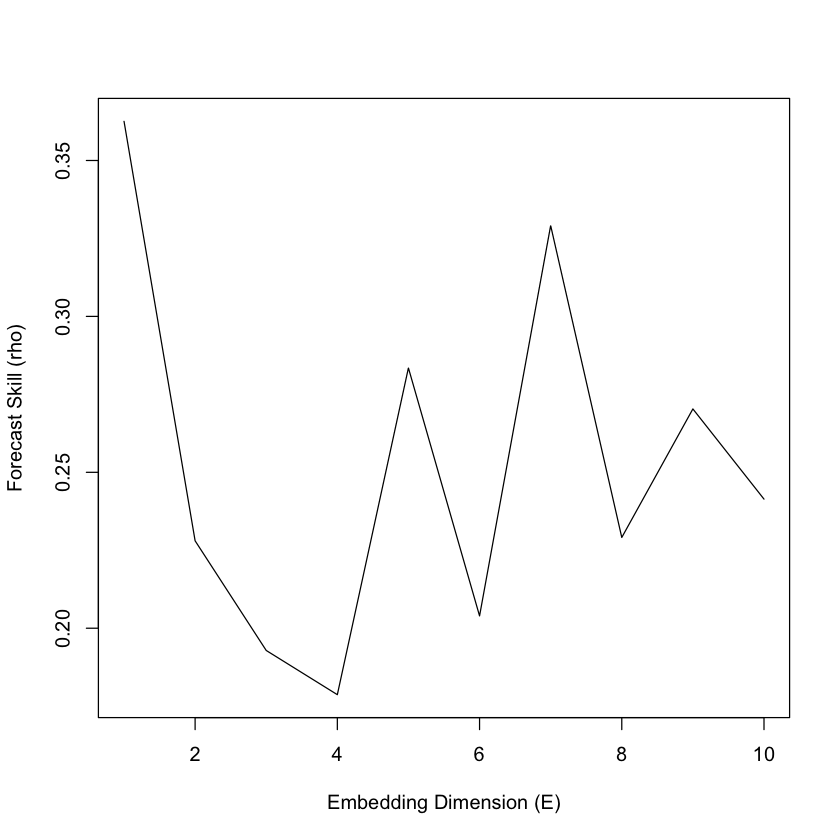

In [83]:
lib <- c(1, 150)
pred <- c(151, 231)
simplex_output = simplex(ts, lib, pred)
plot(simplex_output$E, simplex_output$rho, type = "l", xlab = "Embedding Dimension (E)", 
    ylab = "Forecast Skill (rho)")

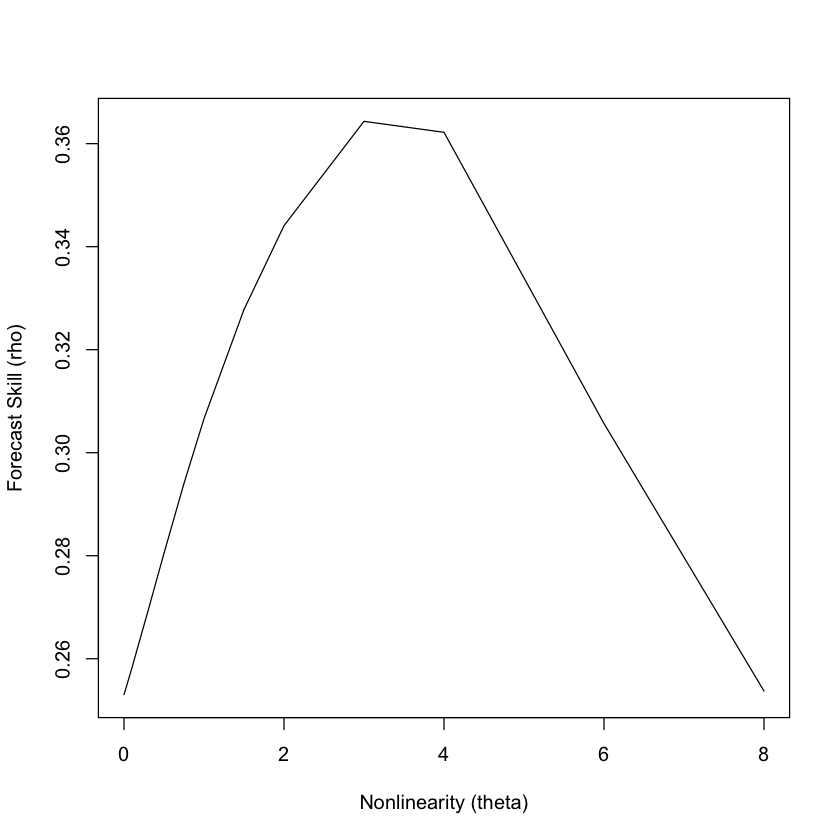

In [84]:
smap_output <- s_map(ts, lib, pred, E = 7)
plot(smap_output$theta, smap_output$rho, type = "l", xlab = "Nonlinearity (theta)", 
    ylab = "Forecast Skill (rho)")

In [85]:
# BLOCK ANALYSIS

In [147]:
subset <- data.frame(uwind = scale(CARIACO$u10), 
                     sst = scale(CARIACO$sst), 
                     chla = scale(CARIACO$Satellite_chla))
subset <- subset[complete.cases(subset),]

In [149]:
subset$time <- seq.int(nrow(subset))

subset <- data.frame(time = subset$time, uwind=subset$uwind, sst=subset$sst, chla=subset$chla)

In [150]:
names(subset)

[1] "time"  "uwind" "sst"   "chla"

In [151]:
lib <- c(1, 150)
pred <- c(151, 274)

cols <- c("chla", "uwind",  "sst")
target <- "chla"

block_smap_output <- block_lnlp(subset, lib = lib, pred = pred, columns = cols, 
    target_column = target, method = "s-map", theta = 2, stats_only = FALSE, 
    first_column_time = TRUE, save_smap_coefficients = TRUE, silent = TRUE)

In [152]:
smap_coeffs <- block_smap_output$smap_coefficients[[1]]
str(smap_coeffs)

'data.frame':	125 obs. of  5 variables:
 $ time        : num  151 152 153 154 155 156 157 158 159 160 ...
 $ C0          : num  NaN -0.346 -0.34 -0.319 -0.327 ...
 $ ∂chla/∂chla : num  NaN -0.692 -0.542 -0.105 -0.123 ...
 $ ∂uwind/∂chla: num  NaN 0.378 0.369 0.191 0.19 ...
 $ ∂sst/∂chla  : num  NaN -0.431 -0.311 -0.125 -0.129 ...


In [153]:
predictions <- block_smap_output$model_output[[1]]
t <- predictions$time

In [154]:
head(smap_coeffs)

,time,C0,∂chla/∂chla,∂uwind/∂chla,∂sst/∂chla
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,151,NaN,NaN,NaN,NaN
2,152,-0.3464029,-0.69214080,0.3781781,-0.4310583
3,153,-0.3403520,-0.54225216,0.3692392,-0.3113058
4,154,-0.3192753,-0.10500356,0.1909831,-0.1247656
5,155,-0.3274446,-0.12279590,0.1899049,-0.1288483
6,156,-0.2526015,-0.00314284,0.1397998,-0.1344611


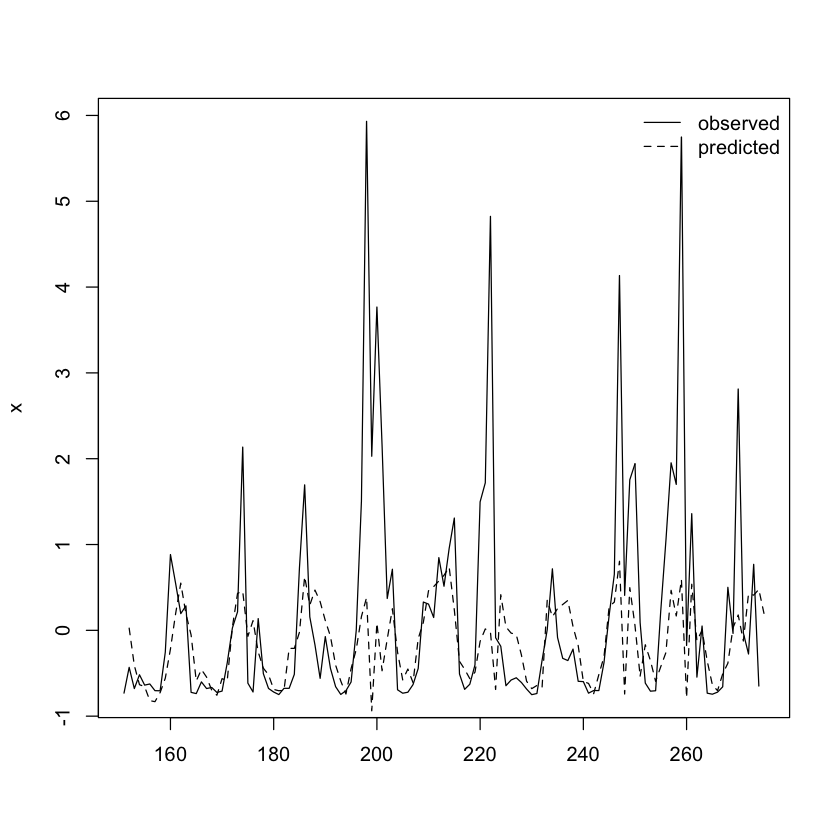

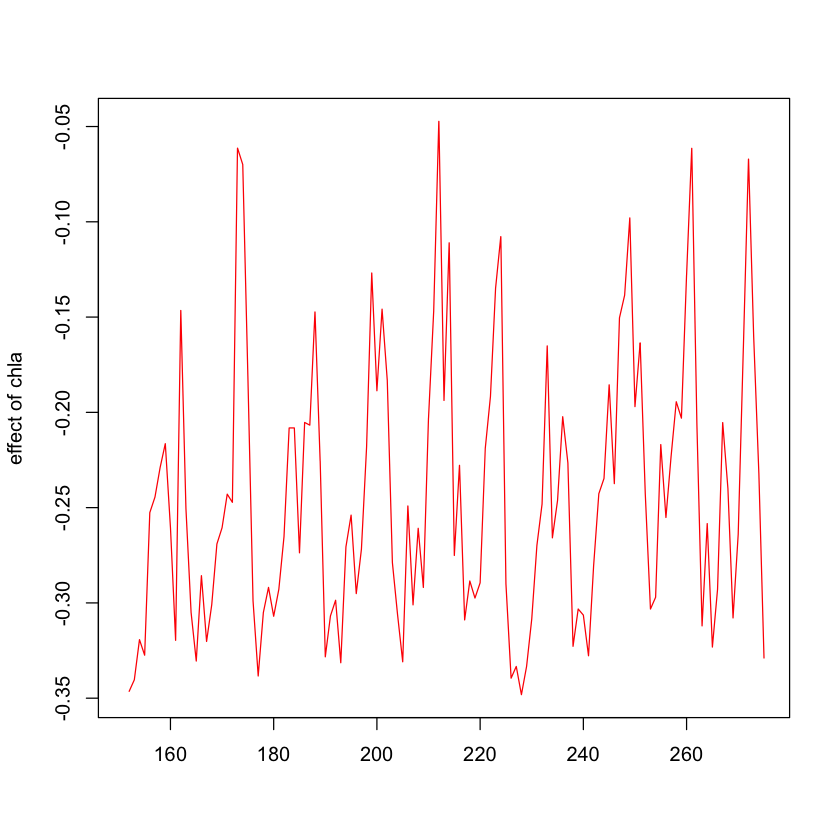

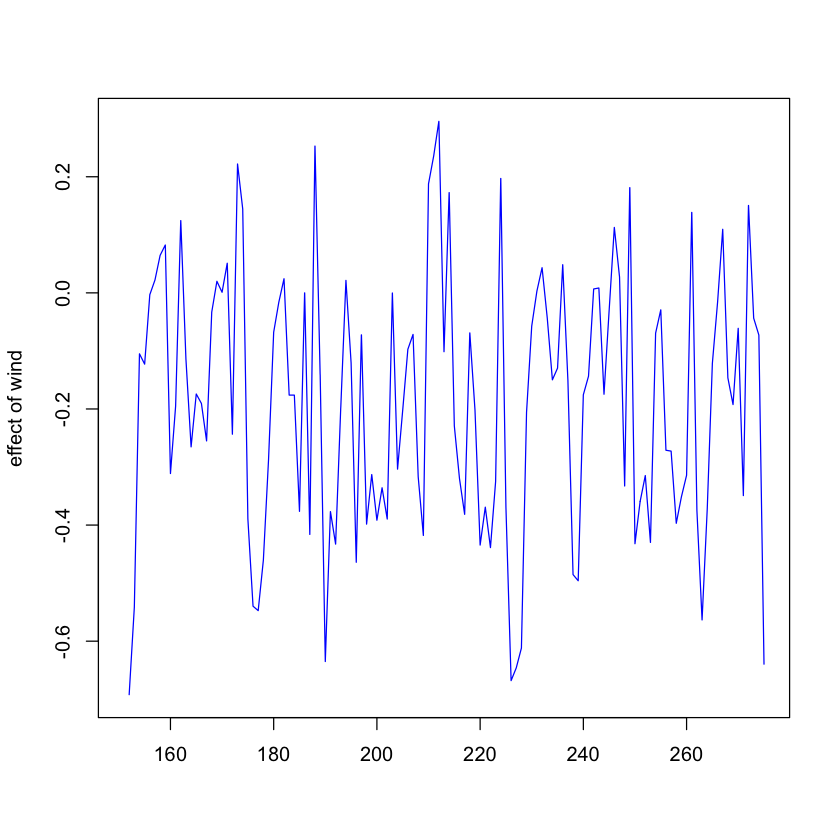

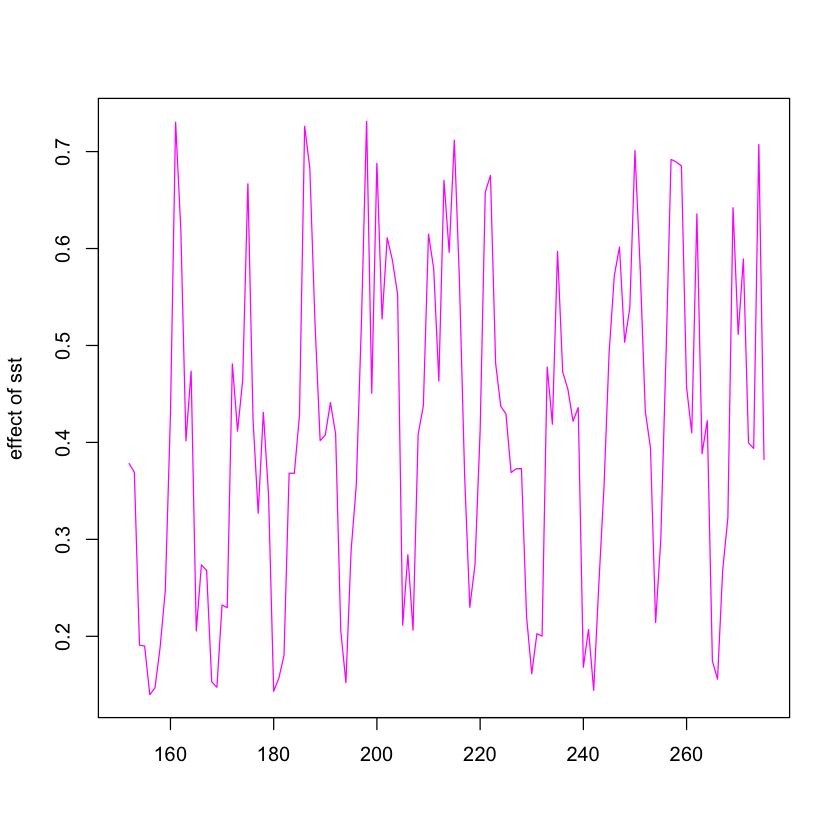

In [155]:
plot(t, predictions$Observations, type = "l", col = "black", ylab = "x", xlab = "")
lines(t, predictions$Predictions, lty = 2)
legend("topright", legend = c("observed", "predicted"), lty = c(1, 2), bty = "n")

plot(t, smap_coeffs[, 2], type = "l", col = "red", ylab = "effect of chla", xlab = "")
plot(t, smap_coeffs[, 3], type = "l", col = "blue", ylab = "effect of wind", xlab = "")
plot(t, smap_coeffs[, 4], type = "l", col = "magenta", ylab = "effect of sst", 
    xlab = "")